In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mencari Nilai `dx`

In [163]:
data_pixel = {
    60: {'x_px': [178, 490, 800, 1112, 1425, 1737], 'y_px': 413},
    120: {'x_px': [102, 294, 483, 674, 864, 1054, 1244, 1436, 1625, 1809], 'y_px': 548},
    180: {'x_px': [348, 485, 620, 756, 892, 1028, 1164, 1300, 1436, 1573], 'y_px': 608},
    240: {'x_px': [478, 585, 692, 800, 907, 1014, 1121, 1230, 1337, 1443], 'y_px': 640},
    300: {'x_px': [561, 652, 740, 828, 917, 1005, 1094, 1181, 1271, 1354], 'y_px': 661},
    360: {'x_px': [627, 700, 775, 850, 924, 998, 1070, 1147, 1221, 1289], 'y_px': 678},
    420: {'x_px': [674, 734, 798, 866, 930, 993, 1056, 1122, 1187, 1246], 'y_px': 688},
    480: {'x_px': [698, 756, 814, 874, 932, 990, 1048, 1107, 1164, 1228], 'y_px': 695},
    540: {'x_px': [726, 774, 827, 883, 936, 987, 1039, 1092, 1148, 1201], 'y_px': 702},
}

In [164]:
xr = {
    60: 143, 120: 88, 180: 65, 240: 50, 300: 41, 360: 35, 420: 29, 480: 27, 540: 25
}

In [165]:
def calculate_dx(data_pixel, xr):
    dx_table = {}

    # Iterasi melalui setiap t dan data piksel
    for t, data in data_pixel.items():
        x_px        = data['x_px']
        x_r         = xr[t]
        dx_values   = []

        # Hitung nilai dx untuk setiap pasangan koordinat x yang berurutan
        for k in range(1, len(x_px)):
            dx = (2.5 / x_r) * (x_px[k] - x_px[k - 1])      # Rumus perhitungan dx
            dx_values.append(round(dx, 4))                  # Ambil 4 angka di belakang koma
            
        dx_table[t] = dx_values
    return dx_table

In [166]:
dx_table = calculate_dx(data_pixel, xr)
dx_table[60] = [None, None] + dx_table[60] + [None, None]

dx_df = pd.DataFrame.from_dict(dx_table, orient='index')
dx_df

,0,1,2,3,4,5,6,7,8
60,NaN,NaN,5.4545,5.4196,5.4545,5.4720,5.4545,NaN,NaN
120,5.4545,5.3693,5.4261,5.3977,5.3977,5.3977,5.4545,5.3693,5.2273
180,5.2692,5.1923,5.2308,5.2308,5.2308,5.2308,5.2308,5.2308,5.2692
240,5.3500,5.3500,5.4000,5.3500,5.3500,5.3500,5.4500,5.3500,5.3000
300,5.5488,5.3659,5.3659,5.4268,5.3659,5.4268,5.3049,5.4878,5.0610
360,5.2143,5.3571,5.3571,5.2857,5.2857,5.1429,5.5000,5.2857,4.8571
420,5.1724,5.5172,5.8621,5.5172,5.4310,5.4310,5.6897,5.6034,5.0862
480,5.3704,5.3704,5.5556,5.3704,5.3704,5.3704,5.4630,5.2778,5.9259
540,4.8000,5.3000,5.6000,5.3000,5.1000,5.2000,5.3000,5.6000,5.3000


# Mencari Nilai `xt`

In [167]:
yt = {60: 5, 120: 10, 180: 15, 240: 20, 300: 25, 360: 30, 420: 35, 480: 40, 540: 45}

In [168]:
def calculate_xt(dx_values, y_value):
    # Inisialisasi daftar xt_values dengan titik awal mobil
    xt_values = [0]

    # Filter nilai None dari dx_values
    dx_values = [dx for dx in dx_values if dx is not None]

    # Hitung nilai dua titik pada posisi tengah dx (mid_dx) 
    mid_dx = dx_values[len(dx_values) // 2] / 2 
    xt_values = [-mid_dx, mid_dx]

    # Hitung nilai xt ke arah kiri
    for dx in dx_values[len(dx_values) // 2 + 1:]:
        xt_values.insert(0, xt_values[0] - dx)

    # Hitung nilai xt ke arah kanan
    for dx in reversed(dx_values[:len(dx_values) // 2]):
        xt_values.append(xt_values[-1] + dx)

        reversed(dx_values[:len(dx_values) // 2])

    return [(round(x, 2), y_value) for x in xt_values]

In [169]:
xt_table = {
    t: calculate_xt(dx_values, y_value)
    for t, (dx_values, y_value) in zip(dx_table.keys(), zip(dx_table.values(), yt.values()))
}

xt_table[60] = [None, None] + xt_table[60] + [None, None]

xt_df = pd.DataFrame.from_dict(xt_table, orient='index')
xt_df

,0,1,2,3,4,5,6,7,8,9
60,None,None,"(-13.65, 5)","(-8.2, 5)","(-2.73, 5)","(2.73, 5)","(8.15, 5)","(13.6, 5)",None,None
120,"(-24.15, 10)","(-18.92, 10)","(-13.55, 10)","(-8.1, 10)","(-2.7, 10)","(2.7, 10)","(8.1, 10)","(13.52, 10)","(18.89, 10)","(24.35, 10)"
180,"(-23.58, 15)","(-18.31, 15)","(-13.08, 15)","(-7.85, 15)","(-2.62, 15)","(2.62, 15)","(7.85, 15)","(13.08, 15)","(18.27, 15)","(23.54, 15)"
240,"(-24.12, 20)","(-18.82, 20)","(-13.47, 20)","(-8.02, 20)","(-2.67, 20)","(2.67, 20)","(8.02, 20)","(13.42, 20)","(18.77, 20)","(24.12, 20)"
300,"(-23.96, 25)","(-18.9, 25)","(-13.41, 25)","(-8.11, 25)","(-2.68, 25)","(2.68, 25)","(8.11, 25)","(13.48, 25)","(18.84, 25)","(24.39, 25)"
360,"(-23.43, 30)","(-18.57, 30)","(-13.29, 30)","(-7.79, 30)","(-2.64, 30)","(2.64, 30)","(7.93, 30)","(13.29, 30)","(18.64, 30)","(23.86, 30)"
420,"(-24.53, 35)","(-19.44, 35)","(-13.84, 35)","(-8.15, 35)","(-2.72, 35)","(2.72, 35)","(8.23, 35)","(14.09, 35)","(19.61, 35)","(24.78, 35)"
480,"(-24.72, 40)","(-18.8, 40)","(-13.52, 40)","(-8.06, 40)","(-2.69, 40)","(2.69, 40)","(8.06, 40)","(13.61, 40)","(18.98, 40)","(24.35, 40)"
540,"(-23.95, 45)","(-18.65, 45)","(-13.05, 45)","(-7.75, 45)","(-2.55, 45)","(2.55, 45)","(7.85, 45)","(13.45, 45)","(18.75, 45)","(23.55, 45)"


# Visualisasi Semua Posisi Sebenarnya `(xt, yt)`

In [170]:
xt_df = pd.DataFrame.from_dict(xt_table, orient='index')
xt_avg = xt_df.map(lambda cell: cell[0] if isinstance(cell, tuple) else None).mean()
xt_avg


0   -24.055000
1   -18.801250
2   -13.428889
3    -8.003333
4    -2.666667
5     2.666667
6     8.033333
7    13.504444
8    18.843750
9    24.117500
dtype: float64

In [171]:
color_patterns_updated = [
    ['black', 'blue'],
    ['blue', 'green'],
    ['green', 'red'],
    ['red', 'white'],
    ['white', 'black'],
    ['red', 'white'],
    ['green', 'red'],
    ['blue', 'green'],
    ['black', 'blue']
]

yt_plot = [0] + list(yt.values())

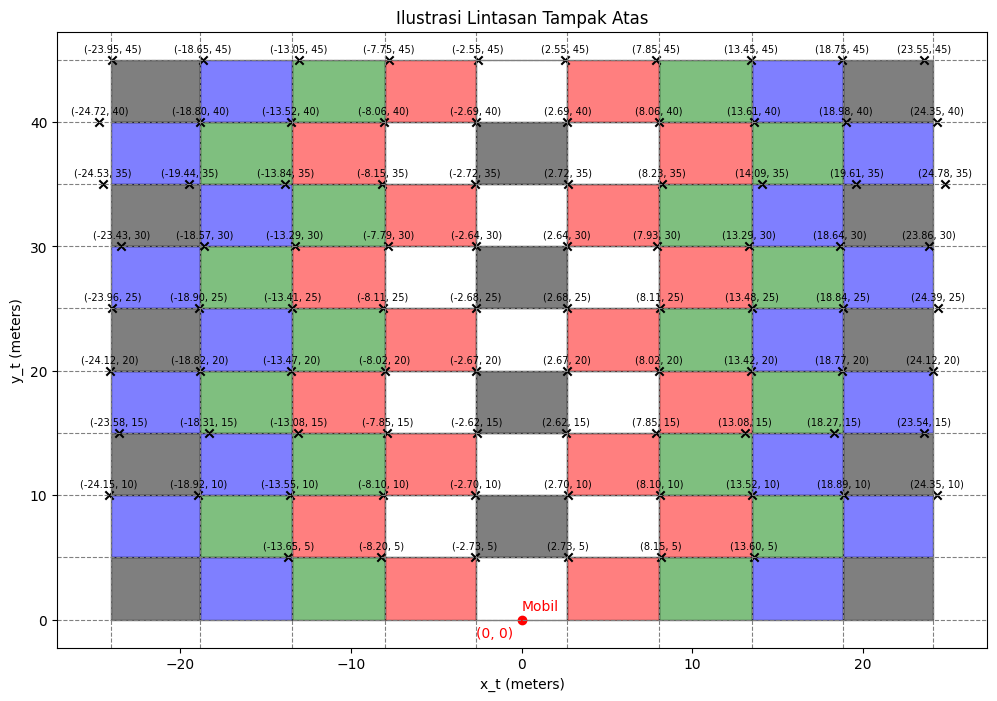

In [172]:
plt.figure(figsize=(12, 8))

for x in xt_avg:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.8)

for y in yt_plot:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.8)

for i in range(len(xt_avg) - 1):
    for j in range(len(yt_plot) - 1):
        x_rect = [xt_avg[i], xt_avg[i + 1], xt_avg[i + 1], xt_avg[i]]
        y_rect = [yt_plot[j], yt_plot[j], yt_plot[j + 1], yt_plot[j + 1]]
        color = color_patterns_updated[i % len(color_patterns_updated)][j % 2]
        plt.fill(x_rect, y_rect, color=color, edgecolor='black', alpha=0.5)

for t, points in xt_table.items():
    for point in points:
        if point is not None:
            plt.scatter(point[0], point[1], color='black', marker='x')
            plt.text(point[0], point[1] + 0.5, f"({point[0]:.2f}, {point[1]})", fontsize=7, ha='center', va='bottom')

plt.scatter(0, 0, color='red', label="Mobil")
plt.text(0, 0.5, "Mobil", color='red', fontsize=10, ha='left', va='bottom')
plt.text(-0.5, -0.5, "(0, 0)", color='red', fontsize=10, ha='right', va='top')

plt.title("Ilustrasi Lintasan Tampak Atas")
plt.xlabel("x_t (meters)")
plt.ylabel("y_t (meters)")
plt.show()